In [1]:
import pandas as pd
import math
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfData = pd.read_csv('/home/archit/Desktop/ad vs organic/final_combined_organic_duration.csv')

/home/archit/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,22,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dfData.head()

,vid,channelId,duration,licensedContent,definition,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,...,Channel subscriberCount,Channel commentCount,Channel videoCount,Channel showRelatedChannels,Channel featuredChannelsUrls,Channel noOfFeaturedChannels,Channel country,Channel keywords,Channel topicIds,Channel topicCategories
0,mqZsF63zEN4,UC-4k5iBbLA1Q1qELNvjagCA,1375.0,True,hd,5.0,20.0,0.0,286118.0,1256.0,...,16085.0,0.0,118.0,True,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...
1,S9UM-hOBGiA,UC-4k5iBbLA1Q1qELNvjagCA,126.0,True,hd,3.0,0.0,0.0,262925.0,10.0,...,16085.0,0.0,118.0,True,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...
2,omZDTXUNXUU,UC-4k5iBbLA1Q1qELNvjagCA,1354.0,True,hd,7.0,21.0,0.0,301233.0,30.0,...,16085.0,0.0,118.0,True,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...
3,E2XB_V-6dwU,UC-4k5iBbLA1Q1qELNvjagCA,1482.0,True,hd,6.0,31.0,0.0,309189.0,1104.0,...,16085.0,0.0,118.0,True,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...
4,3lDqDhyKBwg,UC-4k5iBbLA1Q1qELNvjagCA,607.0,True,hd,17.0,21.0,0.0,41380.0,130.0,...,16085.0,0.0,118.0,True,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...


In [4]:
dfData.shape

(238188, 34)

In [5]:
pd.value_counts(dfData['licensedContent'])

True     232580
False      5605
Name: licensedContent, dtype: int64

In [6]:
pd.value_counts(dfData['definition'])

hd    168376
sd     69809
Name: definition, dtype: int64

In [7]:
pd.value_counts(dfData['Channel country'])

IN    103536
EG    100604
VN     15545
TH      3764
KR      1666
IT      1448
RO       721
ID       714
NL       625
US       457
CA       355
AU       209
GB       204
GR       149
PE        84
MX        78
ES        73
CO        18
Name: Channel country, dtype: int64

In [8]:
pd.value_counts(dfData['channelId'])

UCIt3SC3X_6DPGsBa-9_KffA    80239
UChtEvBpe2GQkVzzxvMLLUHA    21346
UC3G-45OJY0VyLmlXMeFBOHw    20341
UCintIUOJEktQBfhEI9XXpuw    13909
UCabsTV34JwALXKGMqHpvUiA    12575
UCl1uVuvB6Bam18_BBLGHPBA    11761
UCEhnoDvuuEjZ2yi9CxALPxg    10417
UCGH6FMbhlmVDUP96nQVYe2Q     9921
UClQoNRtJzV7AbyccCTAOUVA     7400
UCF1JIbMUs6uqoZEY1Haw0GQ     6497
UC7MlKIi4_Rvbhhvk5wiGysw     6320
UCBQhLER2rVxN2TkSuPfJ6rA     3860
UC8fvuZEXDpKYkgRyR3ihLXg     2723
UC0weja9nEaDcaiuUr8l_BuA     2234
UCj4it2aJ5ZxbZOZPoSdzNAA     2120
UC7ZivIYRB0fMSGh-THcTYbw     1961
UCEzc9HSNLSD4O0YYHVK8iEg     1760
UCd4vEfDwg_kzVI-9Eq8sPHA     1666
UC5MnoJaasj210D8l2jkBVmQ     1500
UC9iBBFfq7L3ipvodSLrU8gQ     1315
UC4qz5w2M-Xmju7WC9ynqRtw     1308
UCJMnwi5o_kFjA_vPgEbQ8Sg     1196
UC0PKLLmL8pIJLjOI1gBH_pA      957
UCjQWCc7OGXkIkYiDv6mXyvw      913
UCk8qq6X7JLgEfipI4Vy2bjg      721
UCdwQOUt3ns-BSWlLFK-fEpA      628
UC1gdQWjgZQh6J_7Q7KbzgZA      625
UC2Rm8Qvk8_RyktfNJ0IzJOg      602
UC4HASgkb75MnG2kMbC-zQrQ      569
UCg20Am9GzsC7D

### Categories exploration

,vid,Mean Views
categoryId,,
23.0,2150,392934
10.0,9945,162537
19.0,118,123245
28.0,555,120361
22.0,10157,115133
24.0,126839,114379
44.0,35,100707
1.0,18865,96296
29.0,1253,38095


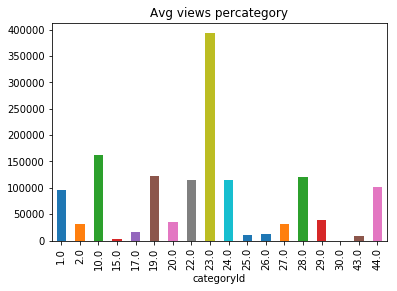

In [10]:
dfData.groupby('categoryId').viewCount.mean().plot(kind = 'bar', title = 'Avg views percategory')
avVal = dfData.groupby('categoryId').viewCount.mean().fillna(0).astype(dtype = 'int64').sort_values(ascending = False)
dfCat = dfData.groupby('categoryId').count()
dfCat['Mean Views'] = avVal
dfCat = dfCat[['vid', 'Mean Views']]
dfCat.sort_values(by = ['Mean Views'], ascending = False)

### Channel Ids exploration

,vid,Mean Views
channelId,,
UCIt3SC3X_6DPGsBa-9_KffA,80239,4863
UChtEvBpe2GQkVzzxvMLLUHA,21346,95306
UC3G-45OJY0VyLmlXMeFBOHw,20341,9448
UCintIUOJEktQBfhEI9XXpuw,13909,175951
UCabsTV34JwALXKGMqHpvUiA,12575,28498
UCl1uVuvB6Bam18_BBLGHPBA,11761,15601
UCEhnoDvuuEjZ2yi9CxALPxg,10417,50064
UCGH6FMbhlmVDUP96nQVYe2Q,9921,107050
UClQoNRtJzV7AbyccCTAOUVA,7400,18311


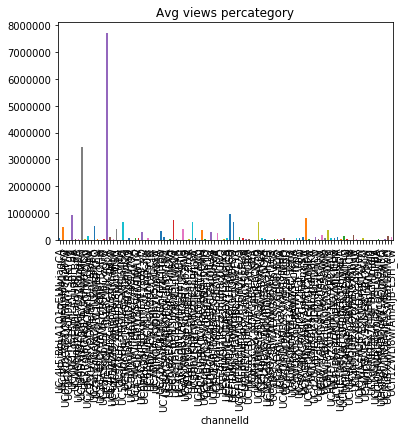

In [11]:
dfData.groupby('channelId').viewCount.mean().plot(kind = 'bar', title = 'Avg views percategory')
avVal2 = dfData.groupby('channelId').viewCount.mean().fillna(0).astype(dtype = 'int64').sort_values(ascending = False)
dfCha = dfData.groupby('channelId').count()
dfCha['Mean Views'] = avVal2
dfCha = dfCha[['vid', 'Mean Views']]
dfCha.sort_values(by = ['vid'], ascending = False)

In [12]:
dfData.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'definition',
       'dislikeCount', 'commentCount', 'favoriteCount', 'viewCount',
       'likeCount', 'relevantTopicIds', 'topicIds', 'topicCategories', 'title',
       'description', 'tags', 'categoryId', 'channelTitle', 'publishedAt',
       'Channel Title', 'Channel Description', 'Channel Publish date',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel featuredChannelsUrls',
       'Channel noOfFeaturedChannels', 'Channel country', 'Channel keywords',
       'Channel topicIds', 'Channel topicCategories'],
      dtype='object')

### Creating final cleaned dataset

In [15]:
dfData2 = dfData.drop(['licensedContent', 'definition', 'relevantTopicIds', 'topicIds', 'topicCategories', 'categoryId', 'channelTitle', 'Channel Title', 'Channel Description', ' Channel hiddenSubscriberCount', 'Channel showRelatedChannels', 'Channel featuredChannelsUrls',
       'Channel noOfFeaturedChannels', 'Channel country', 'Channel keywords',
       'Channel topicIds', 'Channel topicCategories'], axis = 1)

In [16]:
dfData2.columns

Index(['vid', 'channelId', 'duration', 'dislikeCount', 'commentCount',
       'favoriteCount', 'viewCount', 'likeCount', 'title', 'description',
       'tags', 'publishedAt', 'Channel Publish date', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount',
       'Channel videoCount'],
      dtype='object')

In [29]:
# Loading ad stats dataset
dfAdStats = pd.read_csv('/home/archit/Desktop/ad vs organic/resultstats.csv')
dfAdStats2 = dfAdStats.drop(['ch_id','Unnamed: 0'], axis =1)
dfAdStats2.rename(columns = {'video_id':'vid'}, inplace = True)
dfAdStats2.head()

,ad%,vid
0,98.870521,rjxAZLcdiyQ
1,0.000000,ZZpyNDdBQW0
2,0.000000,Pi5dS1x2MjU
3,0.006709,YUtU2FLxsvw
4,0.000000,r5eixuMy-Vk


In [31]:
# Loading perv stats dataset
dfPrevStats = pd.read_csv('/home/archit/Desktop/ad vs organic/previousVideoStats3.csv')
dfPrevStats = dfPrevStats.drop(['Unnamed: 0'], axis =1)
dfPrevStats.rename(columns = {'Id':'vid'}, inplace = True)
dfPrevStats.head()

/home/archit/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PrevCommentCount,PrevDislikeCount,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,vid
0,21.0,7.0,30.0,2018-02-27T03:30:00.000Z,301233.0,Nhỏ To Cùng Mẹ | Kim Nhã Phẫu Thuật Thẩm Mỹ Để...,S9UM-hOBGiA
1,31.0,6.0,1104.0,2018-01-31T09:00:03.000Z,309189.0,"Nhỏ To Cùng Mẹ | Trang Hạ & Phương Trinh nói ""...",omZDTXUNXUU
2,21.0,17.0,130.0,2016-11-15T07:11:54.000Z,41380.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 21 - Bù...,E2XB_V-6dwU
3,18.0,13.0,129.0,2016-11-15T07:14:34.000Z,60971.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 31 - Nh...,3lDqDhyKBwg
4,20.0,6.0,1189.0,2018-02-09T08:14:06.000Z,300972.0,"Nhỏ To Cùng Mẹ | Đừng nghiện việc đến ""chết đi...",qPkIkKC-Kvw


### Merging Dataset

In [ ]:
dfMergedData = dfData2.merge(dfPrevStats, on = 'vid', how = 'left')
dfMergedData = dfMergedData.merge(dfAdStats2, on = 'vid', how = 'left')

In [ ]:
dfTrainingSet = pd.read_csv('')